In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv('supermarketSalesReport.csv', parse_dates=['Date'])

In [4]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales_df.sort_values('Date', inplace=True)

In [6]:
sales_df = sales_df.drop(columns=['Time'])

In [7]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0


In [8]:
sales_df.shape

(1000, 16)

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 856 to 474
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-null

In [10]:
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

####

In [11]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0


In [12]:
round(sales_df['gross income'].sum(), 2), sales_df['Quantity'].sum()

(15379.37, 5510)

In [13]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


In [14]:
sales_df[sales_df['gross income'] < 1].shape[0]

14

In [15]:
sales_df[sales_df['gross income'] > 25].shape[0]

206

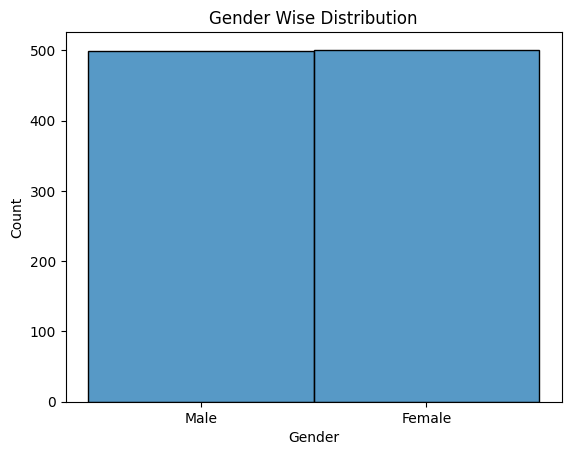

In [16]:
sns.histplot(x=sales_df.Gender)
plt.title('Gender Wise Distribution')
plt.show()

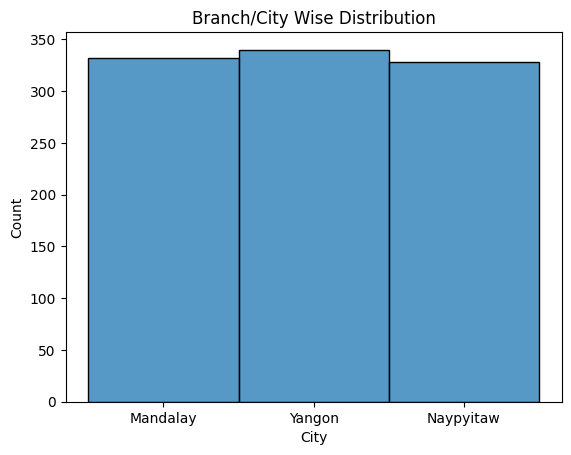

In [17]:
sns.histplot(x=sales_df.City)
plt.title('Branch/City Wise Distribution')
plt.show()

In [18]:
city_income_df = sales_df.groupby('City')['Total'].sum().reset_index(name='Revenue')

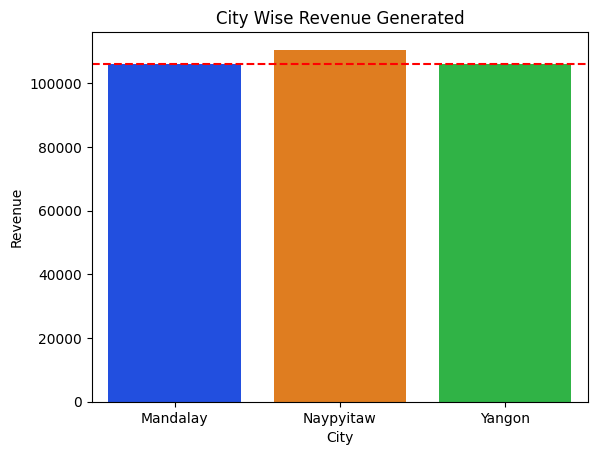

In [19]:
sns.barplot(data=city_income_df, x='City', y='Revenue', palette='bright')
plt.title('City Wise Revenue Generated')
plt.axhline(y=city_income_df['Revenue'].min(), color='red', linestyle='--')
plt.ylabel('Revenue')
plt.show()

In [20]:
customer_sales = sales_df.groupby('Customer type')['Total'].sum().reset_index(name='Total Revenue')

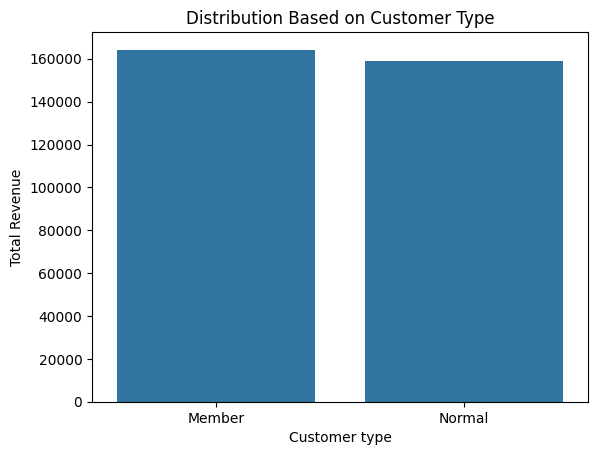

In [21]:
sns.barplot(customer_sales, x='Customer type', y='Total Revenue')
plt.title('Distribution Based on Customer Type')
plt.show()

In [22]:
payment_type_df = sales_df.groupby('Payment')['Total'].sum().reset_index(name='Revenue')

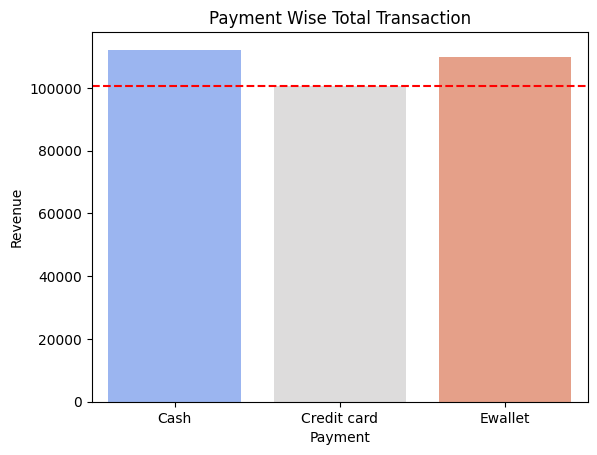

In [23]:
sns.barplot(data = payment_type_df, x='Payment', y='Revenue', palette='coolwarm')
plt.title('Payment Wise Total Transaction')
plt.axhline(y=payment_type_df['Revenue'].min(), color='red', linestyle='--')
plt.show()

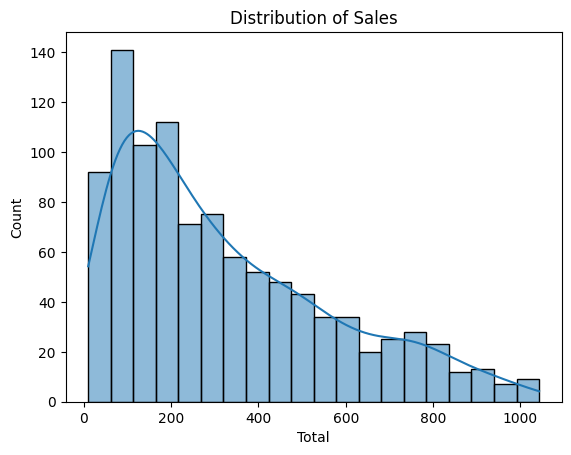

In [24]:
sns.histplot(sales_df['Total'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.show()

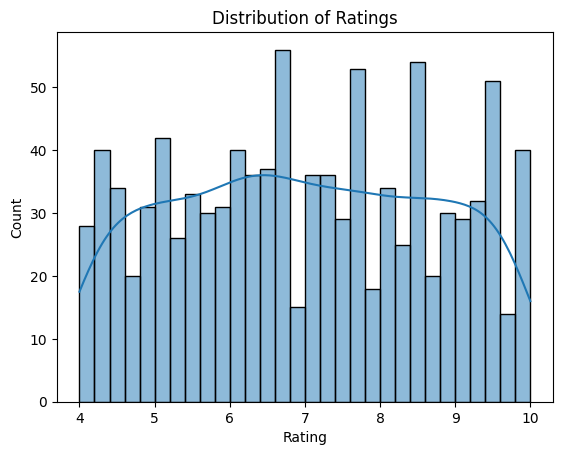

In [25]:
sns.histplot(sales_df.Rating, bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.show()

In [26]:
avg_rating = sales_df.Rating.mean()
std = sales_df.Rating.std()

In [27]:
newdf = sales_df.groupby('Product line')['Rating'].median().reset_index(name='Avg_ratings').sort_values('Avg_ratings', ascending=False)

In [28]:
newdf

,Product line,Avg_ratings
2,Food and beverages,7.30
3,Health and beauty,7.20
4,Home and lifestyle,7.00
1,Fashion accessories,6.95
0,Electronic accessories,6.70
5,Sports and travel,6.70


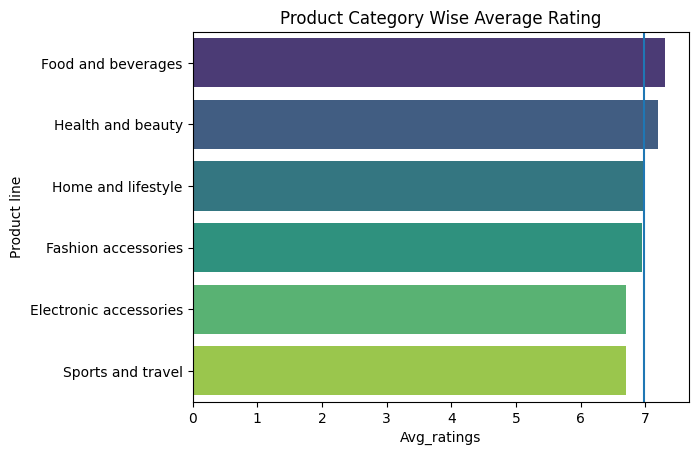

In [29]:
sns.barplot(newdf, y='Product line', x='Avg_ratings', palette='viridis')
plt.title('Product Category Wise Average Rating')
plt.axvline(avg_rating)
plt.show()

In [30]:
product_wise_df = sales_df.groupby('Product line')['Total'].sum().reset_index(name='Revenue').sort_values('Revenue', ascending=False)
product_wise_df2 = sales_df.groupby('Product line')['Product line'].count().reset_index(name='Count').sort_values('Count', ascending=False)

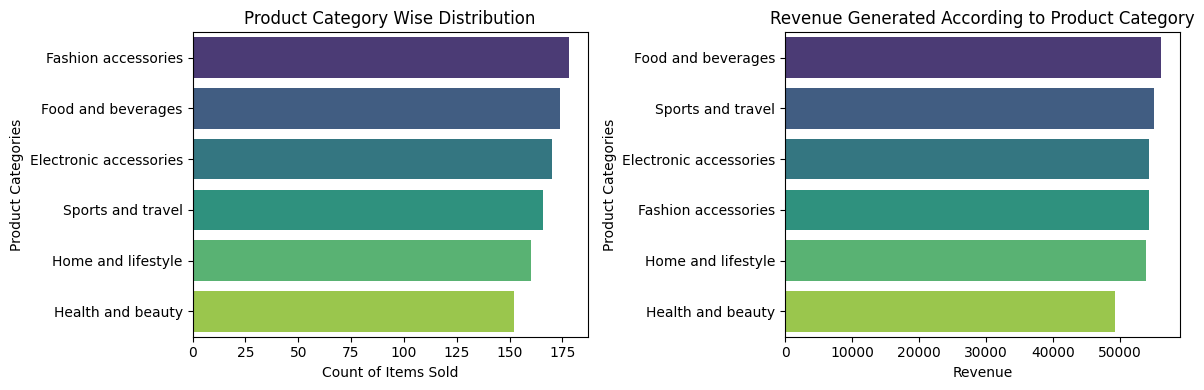

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(product_wise_df, y='Product line', x='Revenue', palette='viridis', ax=axes[1])
axes[1].set_title('Revenue Generated According to Product Category')
axes[1].set_ylabel('Product Categories')

sns.barplot(product_wise_df2, y='Product line', x='Count', palette='viridis', ax=axes[0])
axes[0].set_title('Product Category Wise Distribution')
axes[0].set_xlabel('Count of Items Sold')
axes[0].set_ylabel('Product Categories')

plt.tight_layout()
plt.show()

In [32]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0


In [33]:
dateWiseSales = sales_df.groupby('Date')['Total'].sum().reset_index(name='Total')

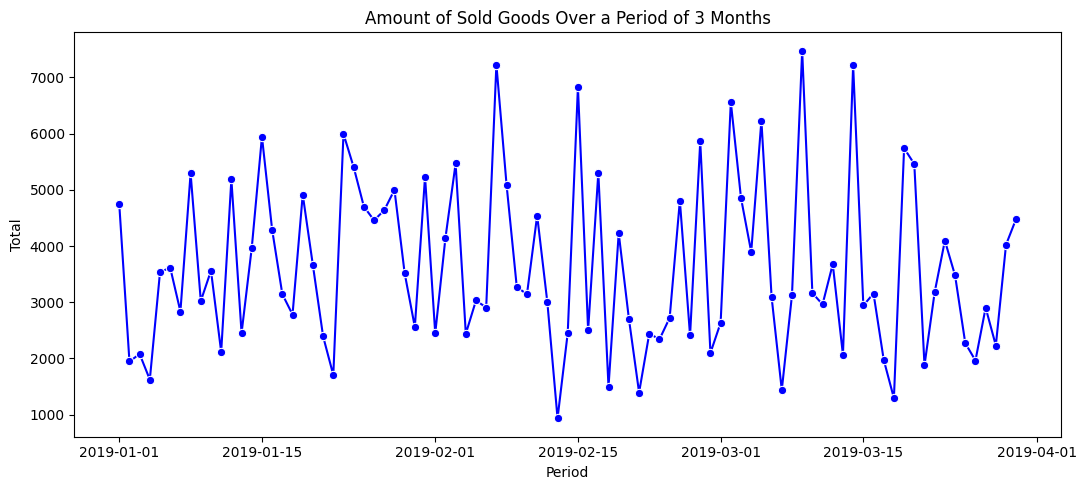

In [34]:
plt.figure(figsize=(11, 5))
sns.lineplot(dateWiseSales, x='Date', y='Total', marker='o', color='blue')
plt.xlabel('Period')
plt.title('Amount of Sold Goods Over a Period of 3 Months')
plt.tight_layout()
plt.show()

In [35]:
payment_df = sales_df.groupby('Payment')['Total'].sum().reset_index()

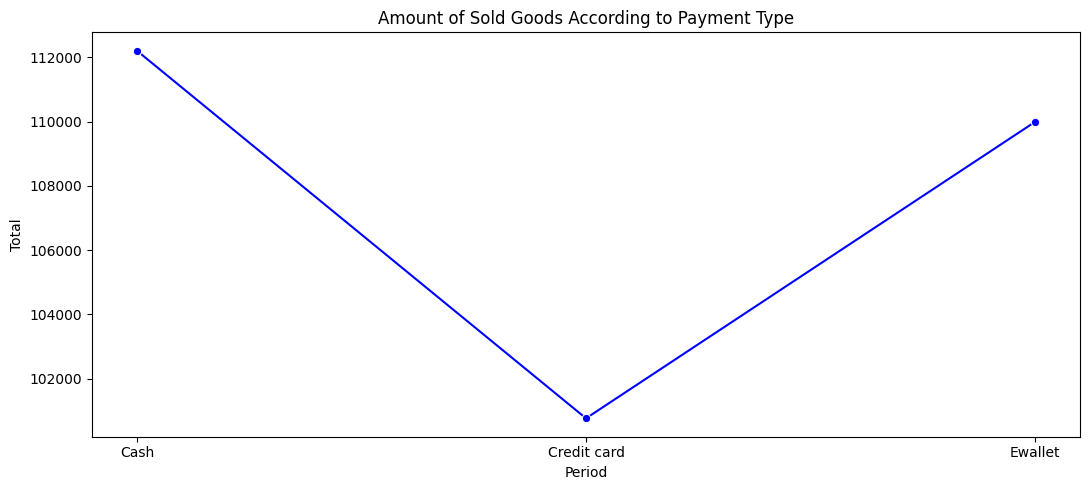

In [36]:
plt.figure(figsize=(11, 5))
sns.lineplot(payment_df, x='Payment', y='Total', marker='o', color='blue')
plt.xlabel('Period')
plt.title('Amount of Sold Goods According to Payment Type')
plt.tight_layout()
plt.show()

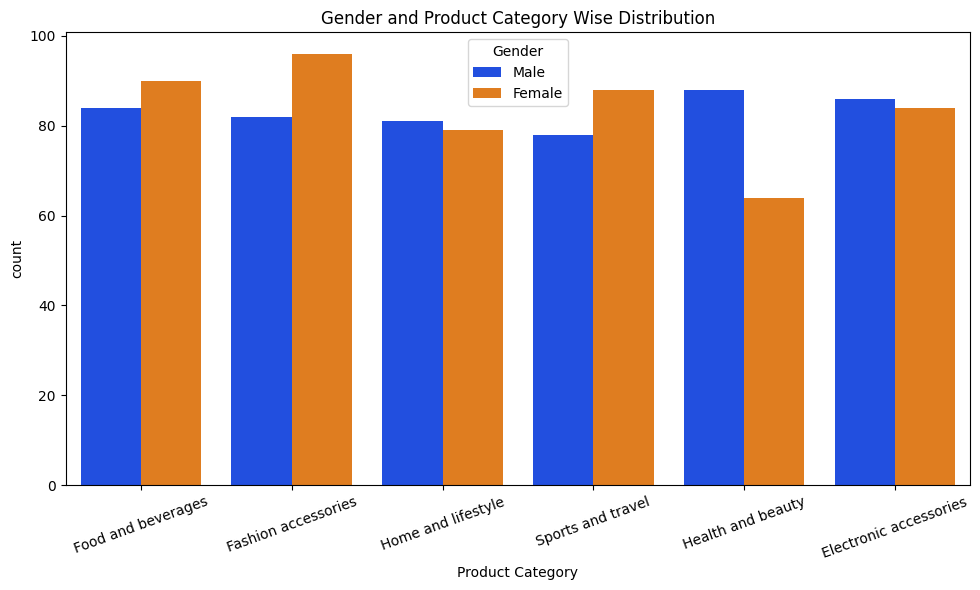

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(sales_df, x='Product line', hue='Gender', palette='bright')
plt.xlabel('Product Category')
plt.title('Gender and Product Category Wise Distribution')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [38]:
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

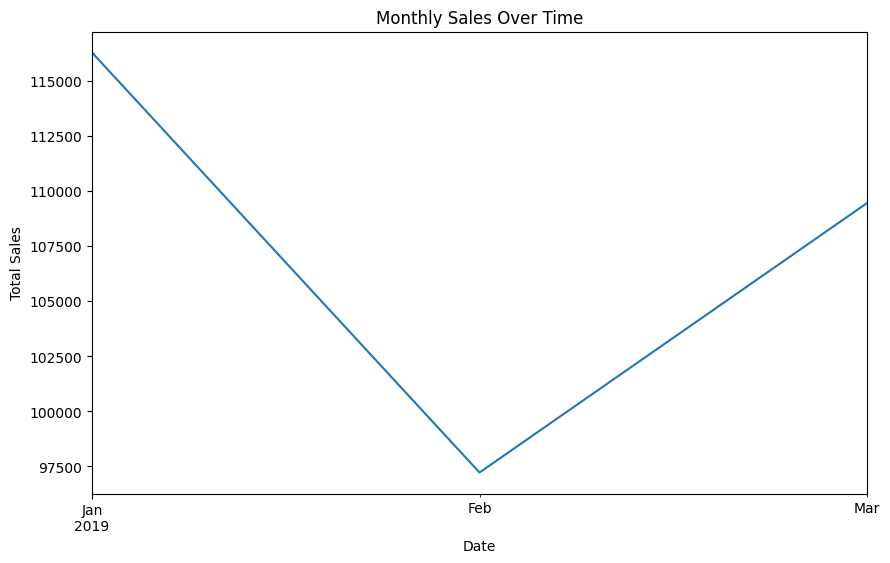

In [39]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date').resample('M').sum()['Total'].plot(figsize=(10, 6))
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.show()


## Key Insights
#### 1. **Revenue by City**: Naypyitaw City generated more revenue than the other two cities.
#### 2. **Customer Type**: There is a very minor difference in revenue based on customer type (Customer vs. Member).
#### 3. **Payment Methods**: Cash and E-wallet transactions are more frequent than credit card transactions.
#### 4. **Price Distribution**: The distribution of sold goods' prices is skewed, with low-priced goods being sold the most.
#### 5. **Product Ratings**: "Food and Beverages" and "Health and Beauty" products received higher ratings compared to other categories.
#### 6. **Product Sales and Revenue**:
####    - "Fashion accessories" and "Food and Beverages" have higher counts of goods sold.
####    - The highest revenue is generated by "Food and Beverages" and "Sports and Travel" categories.
#### 7. **Gender Preferences**: Males tend to buy more "Fashion and Accessories" while females have higher purchases in "Health and Beauty" products.


## Conclusion
#### 1. **City Revenue**: Focus on strategies to generate significant revenue from the other two cities.
#### 2. **Customer Membership**: Introduce benefits for "Members" to boost income and increase sales.
#### 3. **Product Categories**: Develop strategies to improve sales in other product categories beyond "Food and Beverages", "Health and Beauty", "Fashion accessories", and "Sports and Travel".
#### 4. **Gender Preferences**: Tailor marketing strategies to target males for "Fashion and Accessories" and females for "Health and Beauty" products.